## Regresión lineal simple
### La regresión simple es cuando se utiliza una variable independiente para estimar una variable dependiente.

- Response(dependent variable, Y variable, target, outcome): variable que tratamos de predecir.
- Independent variable(X variable, feature, attribute, predictor): La variable que usamos para predecir la respuesta
-Record(row, case, instance, example): El vector de variables predictoras y los valores de salida de un individuo especifico o caso
- Intercept(b0): La interseccioón de la línea de regresión, es decir, el valor pronosticado cuando X=0
- regression coefficient(slope,b1, weights, parameter stimates ): La pendiente de la línea de regresión.
- Fitted values (predicted values): Los estimados obtenidos de la línea de regresión
- Residuals (errors, prediction errors): La diferencia entre los valores observados y los valores ajustados(fitted values)
- Least squares(Mínimos cuadrados): El método de ajustar una regresión minimizando la suma de los residuos al cuadrado.

Ecuación de la pendiente

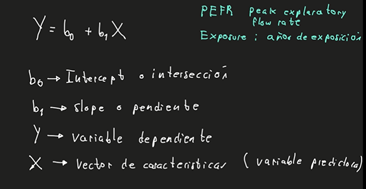

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#### PEFR: Tasa de flujo respiratorio máximo

#### Exposure: Exposición pulmonar de polvo de algodón en años

In [2]:
data = pd.read_csv("./LungDisease.csv")
data

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1
...,...,...
117,450,22
118,490,22
119,500,22
120,370,23


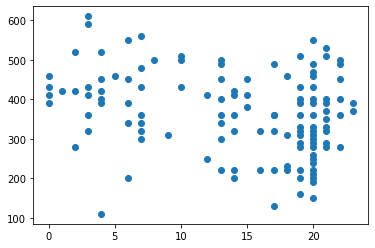

In [3]:
plt.scatter(data.Exposure, data.PEFR)

In [4]:
model = linear_model.LinearRegression()

model.fit(data[['Exposure']],data['PEFR'])

LinearRegression()

In [5]:
data[['Exposure']]

,Exposure
0,0
1,0
2,0
3,0
4,1
...,...
117,22
118,22
119,22
120,23


#### Vamos a imprimir el intercept, coeficiente de los años de exposición o pendiente

In [6]:
print("Intercept: ",model.intercept_)
print("Coefficient: ",model.coef_[0])

Intercept:  424.582806573957
Coefficient:  -4.1845764854614425


In [7]:
model.coef_

array([-4.18457649])

In [8]:
X = [i for i in range(26)]
X = np.array(X)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

#### Ecuación de la pendiente 

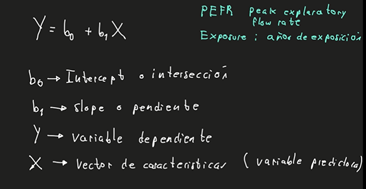

In [9]:
intercept = model.intercept_
coef = model.coef_[0]

# UFuncs de numpy
Y = intercept + coef * X
Y

array([424.58280657, 420.39823009, 416.2136536 , 412.02907712,
       407.84450063, 403.65992415, 399.47534766, 395.29077118,
       391.10619469, 386.9216182 , 382.73704172, 378.55246523,
       374.36788875, 370.18331226, 365.99873578, 361.81415929,
       357.62958281, 353.44500632, 349.26042984, 345.07585335,
       340.89127686, 336.70670038, 332.52212389, 328.33754741,
       324.15297092, 319.96839444])

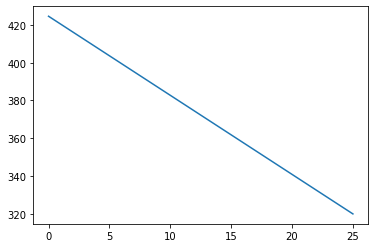

In [10]:
plt.plot(Y)

Regresión lineal simple:
- Encontrar la mejor línea que predice la respuesta como una función de la variable predictora, que sería la exposición. 
- Trata de encontrar la mejor línea
- A cuantos años de exposición vamos a tener un PEFR debilitado

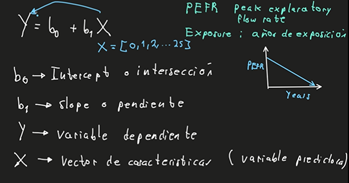

- Vector de características, variable predictora

In [11]:
# Feature vector
x = data['Exposure']

# Response vector
y = data['PEFR']

In [12]:
x

0       0
1       0
2       0
3       0
4       1
       ..
117    22
118    22
119    22
120    23
121    23
Name: Exposure, Length: 122, dtype: int64

In [13]:
y

0      390
1      410
2      430
3      460
4      420
      ... 
117    450
118    490
119    500
120    370
121    390
Name: PEFR, Length: 122, dtype: int64

Debemos estimar los coeficientes.
- Para ello utilizamos el principio de los mínimos cuadrados (Least squares)
- Minimización
- Minimizar le valor residual
- Función de costo

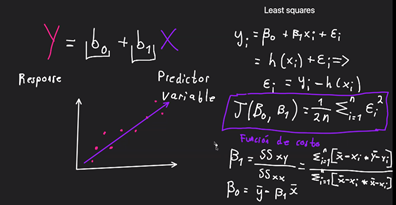

La sumatoria de los valores multiplicados entre xy
La sumatoria de los valores multiplicados entre x

#### Realizando el proceso manual

In [14]:
def calculate_regression_coef(x,y):

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    SSxy = np.sum((mean_x - x) * (mean_y - y))

    SSxx = np.sum((mean_x-x)*(mean_x-x))

    b1 = SSxy/SSxx
    b0 = mean_y - b1 * mean_x

    return (b0,b1)

In [15]:
b0,b1 = calculate_regression_coef(x,y)

In [16]:
print(b0)
print(b1)

424.582806573957
-4.18457648546144


Función que debemos minimizar para que el error se acerque a 0
B0: donde empieza la línea
B1: la pendiente, que inclinación tiene para ayustarse al conjunto de datos
X: la constante


Fitted values: Las predicciones o los valores predecidos.
La diferencia entre los valores observados y los valores ajustados
La información no va a concordar propiamente con la línea
-	El error explicito  


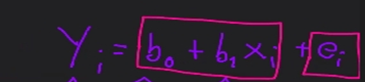

Los datos calculados.
Ajustamos la fórmula para el error explícito.
- Los valores ajustados o residual: Se refiere a los valores predecidos


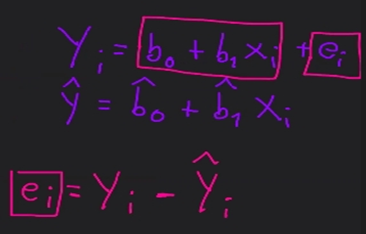

Lo que nosotros estimamos vs lo conocido. Se utiliza y-hat o y gorro
Es un estimado de un parámetro conocido.
Son valores aproximados o estimados


Vamos a calcular Fitted values:
Apartir de que exposición tendríamos problemas en capacidad pulmorar


In [17]:
fitted = model.predict(data[['Exposure']])

fitted

array([424.58280657, 424.58280657, 424.58280657, 424.58280657,
       420.39823009, 416.2136536 , 416.2136536 , 416.2136536 ,
       412.02907712, 412.02907712, 412.02907712, 412.02907712,
       412.02907712, 412.02907712, 407.84450063, 407.84450063,
       407.84450063, 407.84450063, 407.84450063, 407.84450063,
       403.65992415, 399.47534766, 399.47534766, 399.47534766,
       399.47534766, 399.47534766, 395.29077118, 395.29077118,
       395.29077118, 395.29077118, 395.29077118, 395.29077118,
       395.29077118, 391.10619469, 386.9216182 , 382.73704172,
       382.73704172, 382.73704172, 374.36788875, 374.36788875,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       365.99873578, 365.99873578, 365.99873578, 365.99873578,
       365.99873578, 365.99873578, 361.81415929, 361.81415929,
       361.81415929, 357.62958281, 357.62958281, 353.44500632,
       353.44500632, 353.44500632, 353.44500632, 353.44

Veremos los valores ajustados
Errores residuales

Que es la diferencia entre el valor real y el valor predecido

In [18]:
residuals = data['PEFR'] - fitted

residuals

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

Promedio: la media del valor residual.

In [22]:
residuals = data['PEFR'] - fitted.mean()

residuals

0       24.344262
1       44.344262
2       64.344262
3       94.344262
4       54.344262
          ...    
117     84.344262
118    124.344262
119    134.344262
120      4.344262
121     24.344262
Name: PEFR, Length: 122, dtype: float64

-	Si obtenemos = 0 quiere decir que nuestro modelo es perfecto (esto no pasa en la vida real)

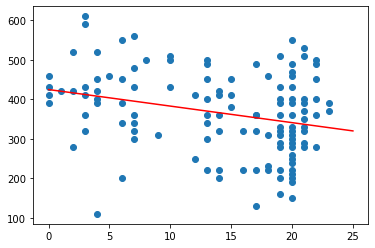

In [19]:
fig = plt.figure()
plt.scatter(data.Exposure,data.PEFR)
plt.plot(Y,color="red")
plt.show()

Entre mas años de exposición menos capacidad pulmonar

- Si el valor residual es muy bajito es confiable el modelo. 
- Debemos medir que tan ajustado es nuestro modelo
- Calculamos el residual para ver que tan ajustado esta nuestro modelo.
¿Qué tanto importa si nuestro modelo no quedo perfecto? Si vemos que nuestros residuals no se ven tan saludables/ modelo preciso

- Si los datos son muy dispersos no sería recomendable usar regresión lineal